# Calcular recurso promedio en Mérida

Calcula los valores promedio de las cantidades físicas solicitadas de un año típico en Mérida (por intervalos de 5 minutos para cada día del año) utilizando la información de las tres bases de datos metereológicos (del 2018 al 2020)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nrel_system.parse_nrel as parse_nrel
import physical_system.setup_variables as setup_variables
import projection_system.setup_projection as setup_projection
import forecast_system.setup_production_forecast as setup_production_forecast

In [26]:
merida = [
    "data/mx-merida/2018.csv",
    "data/mx-merida/2019.csv",
    "data/mx-merida/2020.csv"
]

nrel, L = parse_nrel.main(merida)
nrel = setup_variables.main(nrel,L)
B = 0
BETA = 24
nrel = setup_projection.main(nrel,B,BETA)
nrel = setup_production_forecast.main(nrel)

nrel.head(180)

,YEAR,MONTH,DAY,HOUR,MINUTE,MINS_SINCE_EQUINOX,TEMPERATURE,DNI,DHI,GHI,...,Z,D,H,A,ALPHA,B,BETA,I_PROJ,PROJ_TIME,WH_SQM
0,2018,1,1,0,0,15840.0,23.3,0,0,0,...,177.92,-23.06,0.00,0.00,0.00,0,0,0.00,0.0,0.00
1,2018,1,1,0,5,15845.0,23.2,0,0,0,...,177.83,-23.06,0.00,0.00,0.00,0,0,0.00,5.0,0.00
2,2018,1,1,0,10,15850.0,23.2,0,0,0,...,177.21,-23.06,0.00,0.00,0.00,0,0,0.00,5.0,0.00
3,2018,1,1,0,15,15855.0,23.2,0,0,0,...,176.33,-23.06,0.00,0.00,0.00,0,0,0.00,5.0,0.00
4,2018,1,1,0,20,15860.0,23.2,0,0,0,...,175.32,-23.05,0.00,0.00,0.00,0,0,0.00,5.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2018,1,1,14,35,16715.0,25.9,52,228,256,...,57.56,-23.01,38.75,42.82,32.44,0,24,266.38,5.0,22.20
176,2018,1,1,14,40,16720.0,25.9,98,236,287,...,58.35,-23.01,40.00,43.79,31.65,0,24,307.33,5.0,25.61
177,2018,1,1,14,45,16725.0,25.8,210,229,337,...,59.16,-23.01,41.25,44.74,30.84,0,24,379.62,5.0,31.64
178,2018,1,1,14,50,16730.0,25.7,142,225,296,...,59.99,-23.01,42.50,45.66,30.01,0,24,324.47,5.0,27.04


In [29]:
(jan['WH_SQM'].sum()*0.2*2/1000)*8



642.287424

200.71481999999997


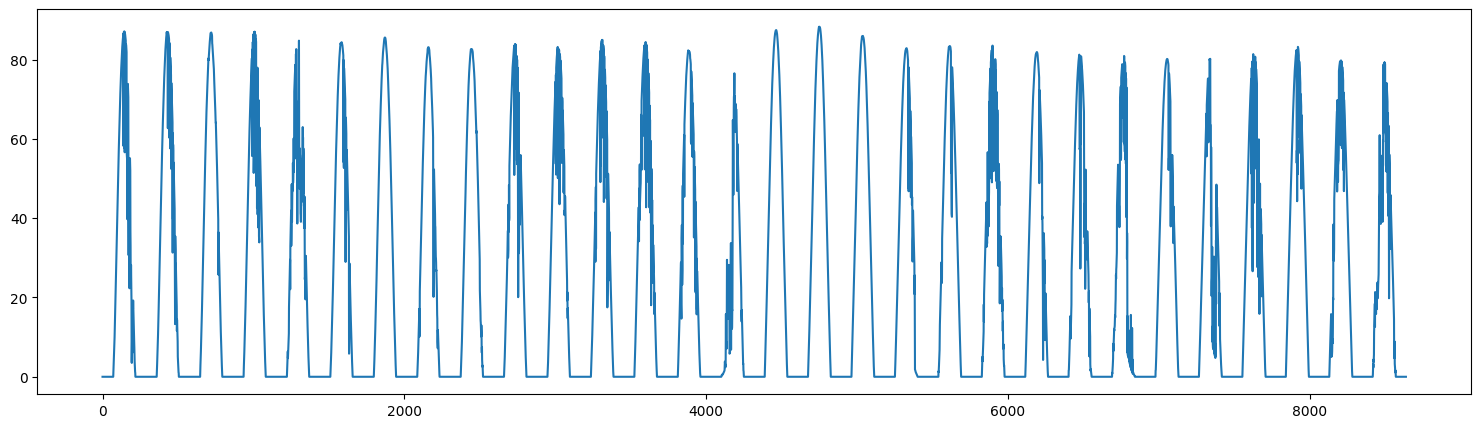

In [11]:
E_sqm = jan['WH_SQM'].to_numpy()

fig = plt.gcf()
fig.set_size_inches(18.5, 5)
plt.plot(E_sqm)
print(E_sqm.sum()/1000)

In [ ]:
B = 0
BETA = 24
nrel = setup_projection.main(nrel,B,BETA)
nrel

In [ ]:
nrel = setup_production_forecast.main(nrel)
nrel.head(90)

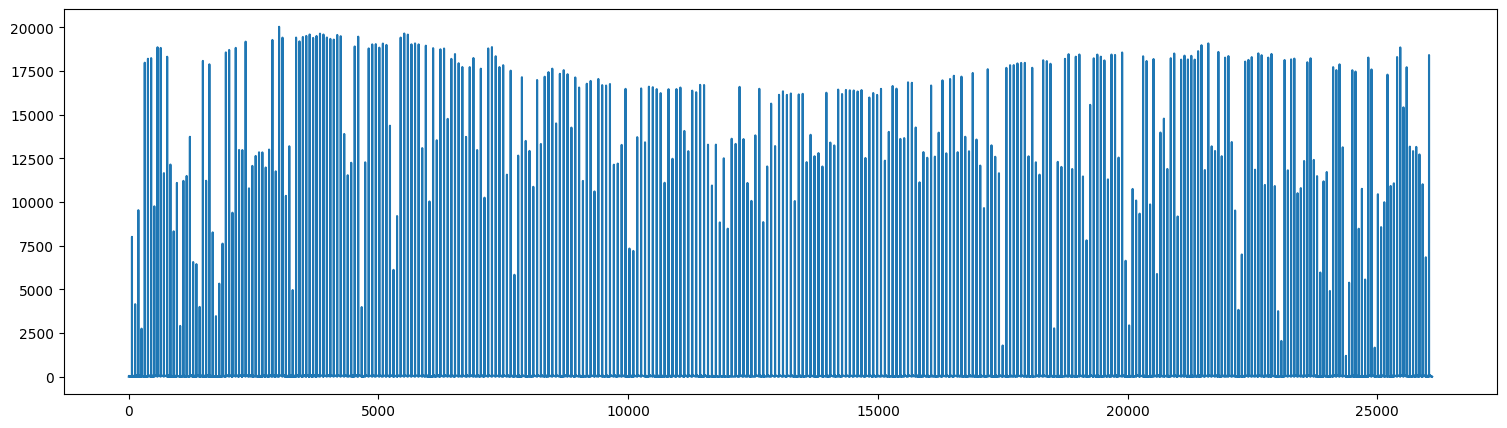

In [7]:
E_sqm = nrel.loc[nrel['YEAR']==2018,['WH_SQM']].to_numpy()

fig = plt.gcf()
fig.set_size_inches(18.5, 5)
plt.plot(E_sqm)

In [58]:
import pandas as pd
import datetime 

def set_energy_production(nrel_df):
    nrel_df['DATETIME'] = pd.to_datetime(nrel_df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE']])
    nrel_df = nrel_df.set_index('DATETIME').sort_index().reset_index()
    nrel_df['DATETIME_SHIFT'] = nrel_df['DATETIME'].shift(1)
    nrel_df['PROJ_TIME'] = (nrel_df['DATETIME'] - nrel_df['DATETIME_SHIFT'])/pd.Timedelta(seconds=60)
    nrel_df.loc[0,['PROJ_TIME']] = 0
    nrel_df['WH_SQM'] = nrel_df['I_PROJ']*nrel_df['PROJ_TIME']/60
    return nrel_df.drop(columns=['DATETIME','DATETIME_SHIFT'])


year = 2020
month = 12
nextYear = year
nextMonth = month + 1
if month == 12:
    nextMonth = 1
    nextYear = year + 1
    
    
spring = {
    "START": datetime.date(year, month, 1),
    "END": datetime.date(nextYear, nextMonth, 1)
}

def filter_between_dates(nrel_df, config):
    nrel_df['DATETIME'] = pd.to_datetime(nrel_df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE']])
    return nrel_df.loc[(nrel_df['DATETIME'] >= pd.Timestamp(config["START"])) & (nrel_df['DATETIME'] < pd.Timestamp(config["END"])) ].drop(columns=['DATETIME'])

set_watt_hour(nrel)


,YEAR,MONTH,DAY,HOUR,MINUTE,MINS_SINCE_EQUINOX,TEMPERATURE,DNI,DHI,GHI,...,Z,D,H,A,ALPHA,B,BETA,I_PROJ,PROJ_TIME,WH_SQM
0,2018,1,1,12,5,16565.0,27.7,267,346,538,...,43.91,-23.01,1.25,1.66,46.09,0,24,596.457097,0.0,0.000000
1,2018,1,1,12,10,16570.0,27.7,261,346,535,...,43.95,-23.01,2.50,3.31,46.05,0,24,592.421817,5.0,49.368485
2,2018,1,1,12,15,16575.0,27.7,133,353,449,...,44.02,-23.01,3.75,4.96,45.98,0,24,478.315432,5.0,39.859619
3,2018,1,1,12,20,16580.0,27.6,160,354,469,...,44.12,-23.01,5.00,6.60,45.88,0,24,504.124222,5.0,42.010352
4,2018,1,1,12,25,16585.0,27.6,211,351,503,...,44.26,-23.01,6.25,8.23,45.74,0,24,549.128534,5.0,45.760711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78287,2020,12,31,17,0,15420.0,27.8,346,28,60,...,84.74,-23.08,75.00,63.08,5.26,0,24,119.651003,5.0,9.970917
78288,2020,12,31,17,5,15425.0,27.8,296,24,46,...,85.76,-23.08,76.25,63.56,4.24,0,24,98.902153,5.0,8.241846
78289,2020,12,31,17,10,15430.0,27.8,243,20,34,...,86.76,-23.08,77.50,64.04,3.24,0,24,77.146630,5.0,6.428886
78290,2020,12,31,17,15,15435.0,27.8,184,16,23,...,87.76,-23.08,78.75,64.51,2.24,0,24,54.301102,5.0,4.525092


I_SUM(0) = 20145435.6
I_SUM(1) = 20249250.5
I_SUM(2) = 20348867.58
I_SUM(3) = 20444256.5
I_SUM(4) = 20535388.18
I_SUM(5) = 20622234.89
I_SUM(6) = 20704770.15
I_SUM(7) = 20782968.83
I_SUM(8) = 20856807.11
I_SUM(9) = 20926262.5
I_SUM(10) = 20991313.83
I_SUM(11) = 21051941.31
I_SUM(12) = 21108126.45
I_SUM(13) = 21159852.14
I_SUM(14) = 21207102.63
I_SUM(15) = 21249863.52
I_SUM(16) = 21288121.8
I_SUM(17) = 21321865.79
I_SUM(18) = 21351085.24
I_SUM(19) = 21375771.22
I_SUM(20) = 21395916.24
I_SUM(21) = 21411514.14
I_SUM(22) = 21422560.18
I_SUM(23) = 21429051.0
I_SUM(24) = 21430984.61
I_SUM(25) = 21428360.43
I_SUM(26) = 21421179.25
I_SUM(27) = 21409443.27
I_SUM(28) = 21393156.06
I_SUM(29) = 21372322.58
I_SUM(30) = 21346949.17
I_SUM(31) = 21317043.57
I_SUM(32) = 21282614.88
I_SUM(33) = 21243673.6
I_SUM(34) = 21200231.58
I_SUM(35) = 21152302.05
I_SUM(36) = 21099899.63
I_SUM(37) = 21043040.26
I_SUM(38) = 20981741.27
I_SUM(39) = 20916021.33
I_SUM(40) = 20845900.46
I_SUM(41) = 20771400.03
I_SUM(42)

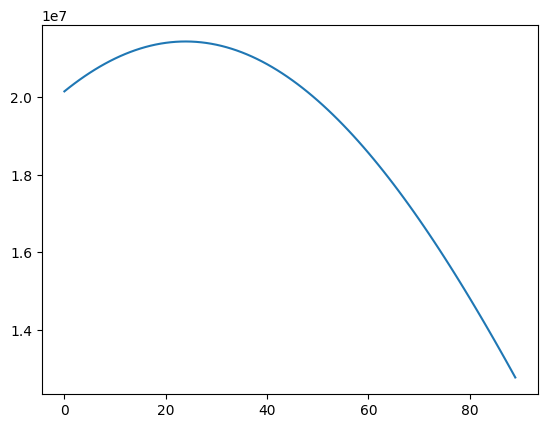

In [6]:

spring = {
    "START": datetime.date(2018, 3, 20),
    "END": datetime.date(2018, 9, 23)
}

def filter_between_dates(nrel_df, config):
    nrel_df['DATETIME'] = pd.to_datetime(nrel_df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE']])
    return nrel_df.loc[(nrel_df['DATETIME'] >= pd.Timestamp(config["START"])) & (nrel_df['DATETIME'] < pd.Timestamp(config["END"])) ].drop(columns=['DATETIME'])

B = 0
BETA_ARR = range(0,90)
I_PROJ_SUM_ARR = []
for BETA in BETA_ARR:
    I_PROJ_SUM = np.round(setup_projection.main(nrel,B,BETA)['I_PROJ'].sum(),2)
    I_PROJ_SUM_ARR.append(I_PROJ_SUM)
    
plt.plot(BETA_ARR,I_PROJ_SUM_ARR)

for idx in range(0,len(BETA_ARR)):
    print('I_SUM('+str(BETA_ARR[idx])+') = ' + str(I_PROJ_SUM_ARR[idx]))

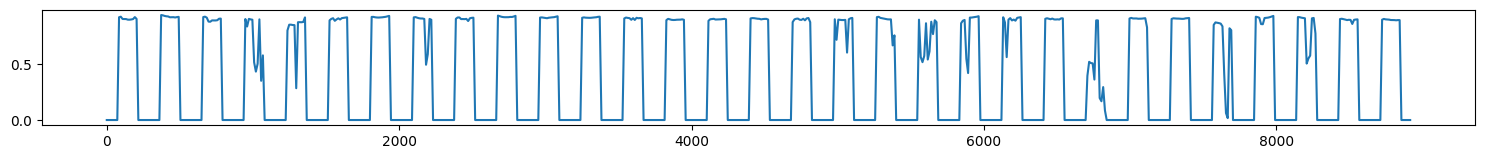

In [186]:
fig = plt.gcf()
fig.set_size_inches(18.5, 1.5)be
plt.plot(nrel.loc[(nrel['MONTH']==1) & (nrel['MINUTE']==0) ]['BETA_OPT'])

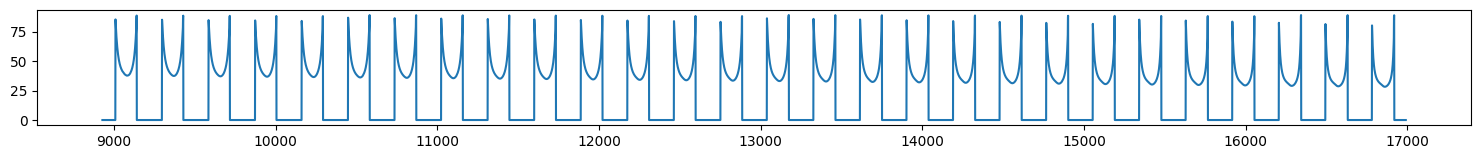

In [151]:
fig = plt.gcf()
fig.set_size_inches(18.5, 1.5)
plt.plot(nrel.loc[(nrel['MONTH']==2)]['B_OPTIMIZED'])

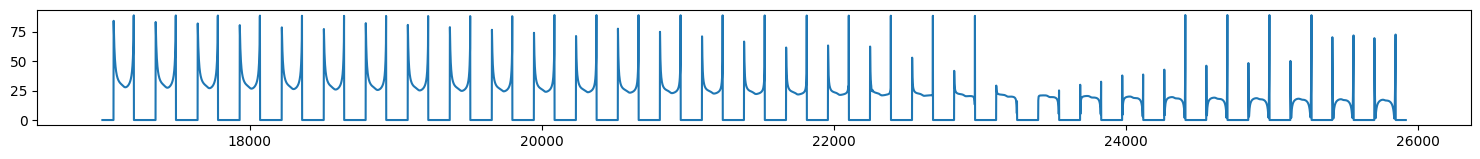

In [152]:
fig = plt.gcf()
fig.set_size_inches(18.5, 1.5)
plt.plot(nrel.loc[(nrel['MONTH']==3)]['B_OPTIMIZED'])

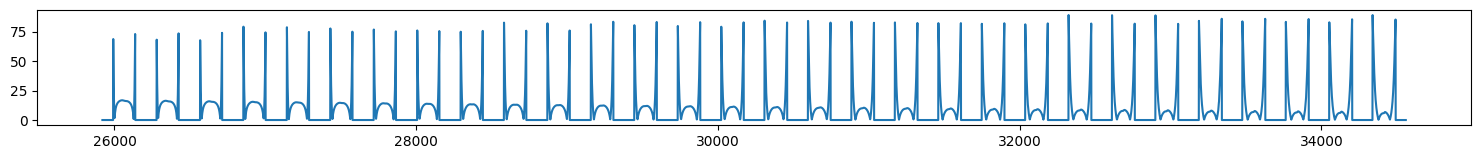

In [153]:
fig = plt.gcf()
fig.set_size_inches(18.5, 1.5)
plt.plot(nrel.loc[(nrel['MONTH']==4)]['B_OPTIMIZED'])

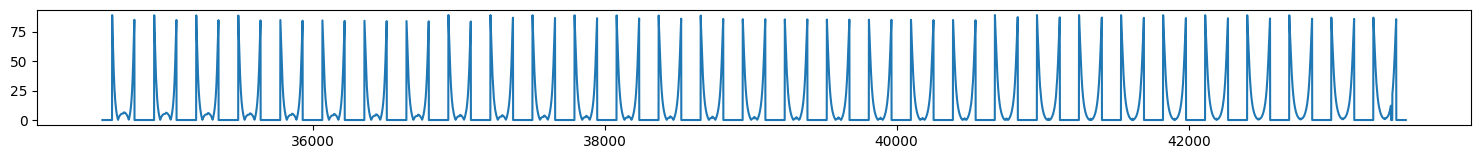

In [154]:
fig = plt.gcf()
fig.set_size_inches(18.5, 1.5)
plt.plot(nrel.loc[(nrel['MONTH']==5)]['B_OPTIMIZED'])

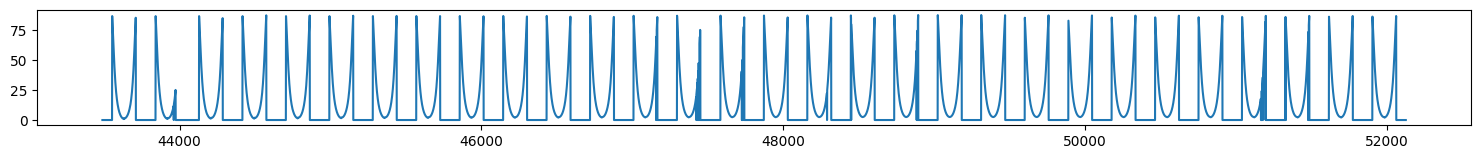

In [155]:
fig = plt.gcf()
fig.set_size_inches(18.5, 1.5)
plt.plot(nrel.loc[(nrel['MONTH']==6)]['B_OPTIMIZED'])

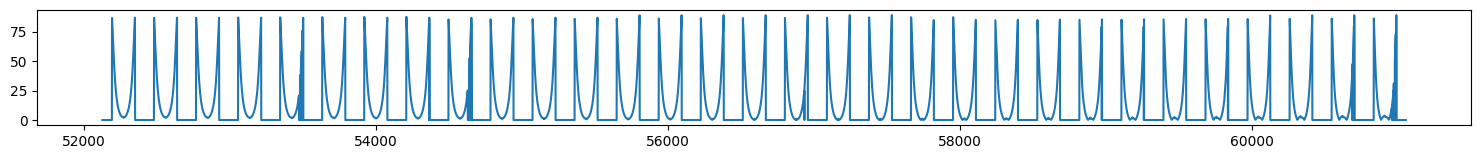

In [156]:
fig = plt.gcf()
fig.set_size_inches(18.5, 1.5)
plt.plot(nrel.loc[(nrel['MONTH']==7)]['B_OPTIMIZED'])

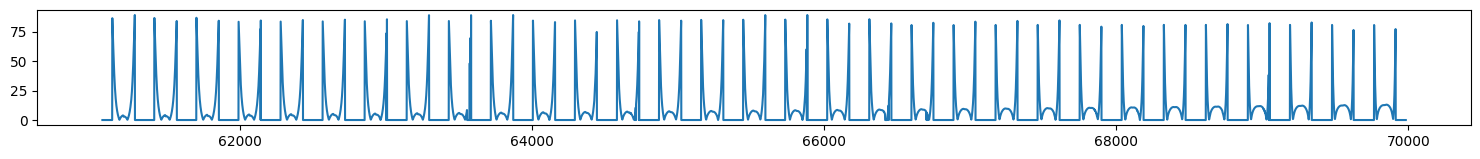

In [157]:
fig = plt.gcf()
fig.set_size_inches(18.5, 1.5)
plt.plot(nrel.loc[(nrel['MONTH']==8)]['B_OPTIMIZED'])

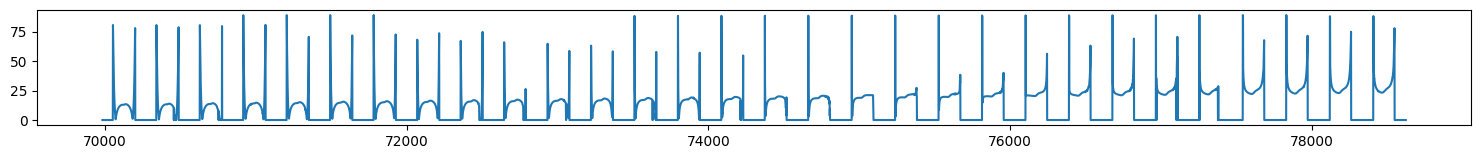

In [158]:
fig = plt.gcf()
fig.set_size_inches(18.5, 1.5)
plt.plot(nrel.loc[(nrel['MONTH']==9)]['B_OPTIMIZED'])

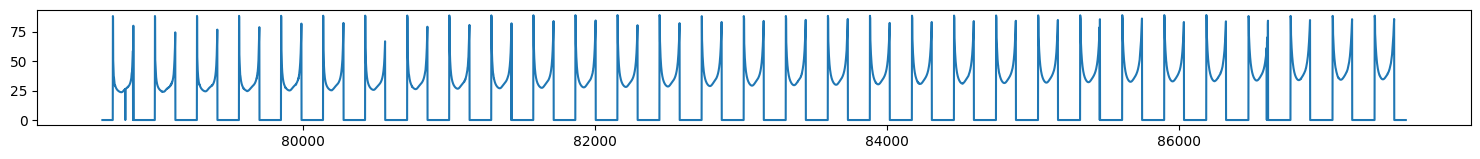

In [159]:
fig = plt.gcf()
fig.set_size_inches(18.5, 1.5)
plt.plot(nrel.loc[(nrel['MONTH']==10)]['B_OPTIMIZED'])

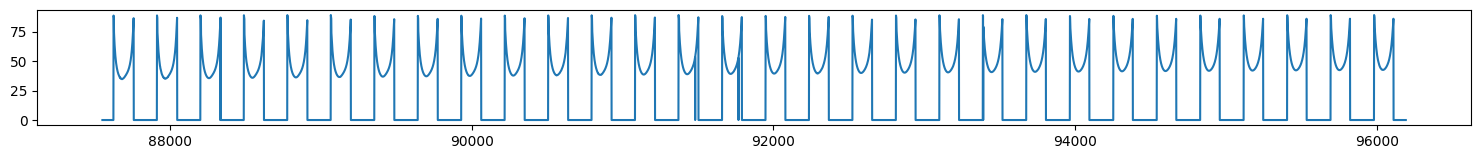

In [160]:
fig = plt.gcf()
fig.set_size_inches(18.5, 1.5)
plt.plot(nrel.loc[(nrel['MONTH']==11)]['B_OPTIMIZED'])

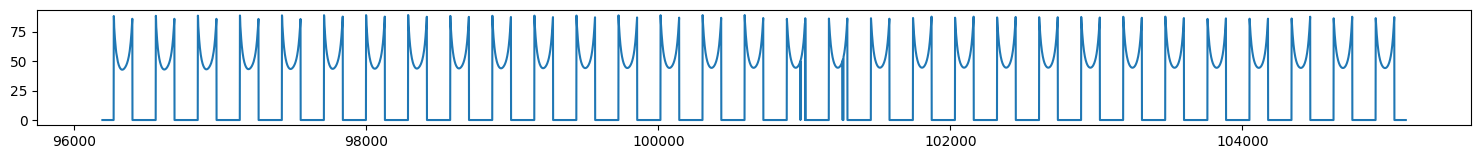

In [161]:
fig = plt.gcf()
fig.set_size_inches(18.5, 1.5)
plt.plot(nrel.loc[(nrel['MONTH']==12)]['B_OPTIMIZED'])

In [51]:
import matplotlib.dates as mdates


ValueError: x and y must have same first dimension, but have shapes (10,) and (315360,)

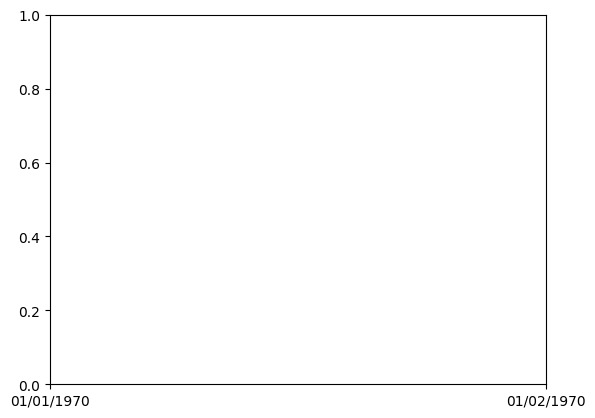

In [53]:
a = nrel['B_OPTIMIZED']

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.plot(pd.date_range(datetime.date(2016,1,1), periods=10, freq='D'), a)
plt.gcf().autofmt_xdate()

In [46]:
nrel.drop(columns=['YEAR']).groupby(['MONTH','DAY','HOUR','MINUTE']).mean(numeric_only=True)

MINS_SINCE_EQUINOX  TEMPERATURE  DNI  DHI  GHI  X_DIF  \
MONTH DAY HOUR MINUTE                                                          
1     1   0    0                  15840.0    23.300000  0.0  0.0  0.0    0.0   
               5                  15845.0    23.266667  0.0  0.0  0.0    0.0   
               10                 15850.0    23.200000  0.0  0.0  0.0    0.0   
               15                 15855.0    23.200000  0.0  0.0  0.0    0.0   
               20                 15860.0    23.166667  0.0  0.0  0.0    0.0   
...                                   ...          ...  ...  ...  ...    ...   
12    31  23   35                 15815.0    23.433333  0.0  0.0  0.0    0.0   
               40                 15820.0    23.433333  0.0  0.0  0.0    0.0   
               45                 15825.0    23.366667  0.0  0.0  0.0    0.0   
               50                 15830.0    23.333333  0.0  0.0  0.0    0.0   
               55                 15835.0    23.300000  0.0  0.0  0.0    0.0   

                       X_DIR           Z          D    H    A  ALPHA   GI  \
MONTH DAY HOUR MINUTE                                                       
1     1   0    0         0.0  177.903333 -23.056048  0.0  0.0    0.0  0.0   
               5         0.0  177.800000 -23.055769  0.0  0.0    0.0  0.0   
               10        0.0  177.180000 -23.055490  0.0  0.0    0.0  0.0   
               15        0.0  176.293333 -23.055210  0.0  0.0    0.0  0.0   
               20        0.0  175.283333 -23.054931  0.0  0.0    0.0  0.0   
...                      ...         ...        ...  ...  ...    ...  ...   
12    31  23   35        0.0  173.480000 -23.057442  0.0  0.0    0.0  0.0   
               40        0.0  174.570000 -23.057163  0.0  0.0    0.0  0.0   
               45        0.0  175.616667 -23.056884  0.0  0.0    0.0  0.0   
               50        0.0  176.600000 -23.056606  0.0  0.0    0.0  0.0   
               55        0.0  177.420000 -23.056327  0.0  0.0    0.0  0.0   

                       B_OPTIMIZED  
MONTH DAY HOUR MINUTE               
1     1   0    0               0.0  
               5               0.0  
               10              0.0  
               15              0.0  
               20              0.0  
...                            ...  
12    31  23   35              0.0  
               40              0.0  
               45              0.0  
               50              0.0  
               55              0.0  

[105120 rows x 14 columns]

AttributeError: 'DatetimeProperties' object has no attribute 'mins'

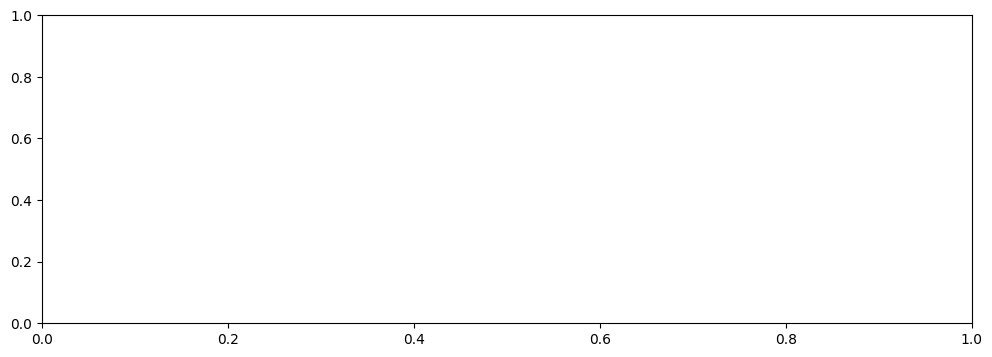

In [48]:
fig, axs = plt.subplots(figsize=(12, 4))

nrel.groupby(nrel["DATETIME"].dt.mins)["B_OPTIMIZED"].mean().plot(
    kind='bar', rot=0, ax=axs
)

In [ ]:
print(L)

In [9]:
def get_solar_declination_angle(minutes_since_equinox):
    """
    minutes_since_equinox refers to the number of minutes that have gone through since december 21st at 00:00 hrs
    minimum value is 0 and maximum value is 364
    """
    minutes_in_a_year = 365.25*24*60
    return np.arcsin(-np.cos(np.deg2rad(360*(minutes_since_equinox/minutes_in_a_year))) * np.sin(np.deg2rad(23.5))) 

def get_minutes_since_equinox(month,day,hour,minutes):
    """
    month: minimum value is 1 and maximum value is 12
    day: minimum value is 1 and maximum value is 31
    hour: minimum value is 0 and maximum value is 23
    minutes: minimum value is 0 and maximum value is 59
    """
    if month == 12:
        year = 2021
    else: 
        year = 2022
    d1 = datetime.datetime(2021,12,21,0,0)
    d2 = datetime.datetime(year,month,day,hour,minutes)
    return (d2-d1).total_seconds() / 60


def get_latest_record_available(nrel_df):
    nrel_df = nrel_df[nrel_df.MONTH == nrel_df.MONTH.max()]
    nrel_df = nrel_df[nrel_df.DAY == nrel_df.DAY.max()]
    nrel_df = nrel_df[nrel_df.HOUR == nrel_df.HOUR.max()]
    nrel_df = nrel_df[nrel_df.MINUTE == nrel_df.MINUTE.max()]
    return nrel_df

In [10]:
nrel['MINS_SINCE_EQUINOX'] = nrel.apply(lambda x: get_minutes_since_equinox(x['MONTH'].astype(int), x['DAY'].astype(int),x['HOUR'].astype(int),x['MINUTE'].astype(int)), axis=1)
nrel

,MONTH,DAY,HOUR,MINUTE,DHI,DNI,TEMPERATURE,GHI,SOLAR_ZENITH_ANGLE,X_DIF,X_DIR,D,H,A,ALPHA,GI,BETA_OPTIMIZED,MINS_SINCE_EQUINOX
77,12,1,6,25,0.000000,0.000000,21.500000,0.000000,89.113333,0.000000,0.000000,-23.499737,-83.75,0.000000,0.886667,0.000000,0.000000,-28415.0
78,12,1,6,30,14.000000,66.000000,21.600000,16.333333,88.146667,0.175000,0.825000,-23.499730,-82.50,0.000000,1.853333,80.985807,88.146667,-28410.0
79,12,1,6,35,19.666667,74.000000,21.633333,23.333333,87.150000,0.209964,0.790036,-23.499723,-81.25,0.000000,2.850000,93.615653,87.150000,-28405.0
80,12,1,6,40,23.333333,137.333333,21.700000,33.000000,86.136667,0.145228,0.854772,-23.499716,-80.00,-64.574789,3.863333,162.705842,81.061112,-28400.0
81,12,1,6,45,29.666667,171.000000,21.766667,44.000000,85.113333,0.147841,0.852159,-23.499708,-78.75,-64.119926,4.886667,199.608235,78.917684,-28395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105036,11,30,17,0,19.333333,57.666667,26.400000,22.000000,87.203333,0.251082,0.748918,-23.498918,75.00,62.697551,2.796667,76.488964,83.920961,496380.0
105037,11,30,17,5,11.666667,58.666667,26.400000,13.666667,88.203333,0.165877,0.834123,-23.498932,76.25,63.181947,1.796667,71.169911,86.022757,496385.0
105038,11,30,17,10,0.000000,0.000000,26.400000,0.000000,89.173333,0.000000,0.000000,-23.498946,77.50,63.656200,0.826667,0.000000,0.000000,496390.0
105039,11,30,17,15,0.000000,0.000000,26.400000,0.000000,90.090000,0.000000,0.000000,-23.498960,78.75,64.120612,0.000000,0.000000,0.000000,496395.0


In [84]:
mins = get_minutes_since_equinox(12,21,0,3)

np.rad2deg(get_solar_declination_angle(mins))

3.0


-23.499999984001054

In [85]:
get_days_since_equinox(11,21)

335

In [ ]:
# Angulo Declinacion


def get_solar_declination_angle(days_since_equinox):
    """
    days_since_equinox refers to the number of days that have gone through since december 21st
    minimum value is 0 and maximum value is 364
    """
    D = np.arcsin(-np.cos(np.deg2rad(360*(days_since_equinox/365.25)) * np.sin(np.deg2rad(23.5))) 







# Angulo de hora
H = np.deg2rad((360/24) * (hora - 12))
# Angulo Zenith
Z = np.rad2deg(np.arccos(np.sin(D)*np.sin(L) + np.cos(D)*np.cos(L)*np.cos(H)))
# Angulo Azimutal
A = np.rad2deg(np.arctan((np.cos(D)*np.sin(H))/(np.cos(D)*np.sin(L)*np.cos(H)-np.sin(D)*np.cos(L))))
# Guardamos en df

In [3]:
# Funcion para pasar cada base de datos a df acomodado
def crea_df(año, Lat):
    name = str(año) + '.csv'
    with open(name, newline='') as file:
        F = csv.reader(file)
        next(F)
        next(F)
        Columns = next(F)
        df = pd.DataFrame(F,columns=Columns)
    
    # damos formato coorecto a df
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
    df = df[['Date','DHI','DNI','GHI','Temperature']]
    df = df.rename(columns={'DHI': 'I diff', 'DNI': 'ID(RD)', 'GHI': 'IG(PH)'})
    df = df.set_index('Date')
    df = df.astype(float)
    df = df.sort_index()
    # Calculamos angulos solares
    L = np.deg2rad(Lat)    # Latitud de la ciudad en radianes
    dia = df.index.dayofyear
    hora = df.index.hour
    minuto = df.index.minute*0.5/30
    hora = hora + minuto
    # Angulo Declinacion
    D = np.arcsin(-np.cos(np.deg2rad(360*(dia+10)/365.25)) * np.sin(np.deg2rad(23.5))) 
    # Angulo de hora
    H = np.deg2rad((360/24) * (hora - 12))
    # Angulo Zenith
    Z = np.rad2deg(np.arccos(np.sin(D)*np.sin(L) + np.cos(D)*np.cos(L)*np.cos(H)))
    # Angulo Azimutal
    A = np.rad2deg(np.arctan((np.cos(D)*np.sin(H))/(np.cos(D)*np.sin(L)*np.cos(H)-np.sin(D)*np.cos(L))))
    # Guardamos en df
    df['Ang Altura (a)'] = 90 - Z
    df.loc[df['Ang Altura (a)'] < 0, 'Ang Altura (a)'] = 0
    df['Ang Azimutal (A)'] = A
    df.loc[df['Ang Altura (a)'] == 0, 'Ang Azimutal (A)'] = 0
    return df

In [5]:
Lat_merida = 25.69
crea_df(2018, Lat_merida)

,I diff,ID(RD),IG(PH),Temperature,Ang Altura (a),Ang Azimutal (A)
Date,,,,,,
2018-01-01 00:00:00,0.0,0.0,0.0,23.3,0.0,0.0
2018-01-01 00:05:00,0.0,0.0,0.0,23.2,0.0,0.0
2018-01-01 00:10:00,0.0,0.0,0.0,23.2,0.0,0.0
2018-01-01 00:15:00,0.0,0.0,0.0,23.2,0.0,0.0
2018-01-01 00:20:00,0.0,0.0,0.0,23.2,0.0,0.0
...,...,...,...,...,...,...
2018-12-31 23:35:00,0.0,0.0,0.0,23.4,0.0,0.0
2018-12-31 23:40:00,0.0,0.0,0.0,23.4,0.0,0.0
2018-12-31 23:45:00,0.0,0.0,0.0,23.3,0.0,0.0
